## Title :
Pooling Mechanics

## Description :
The aim of this exercise is to understand the tensorflow.keras implementation of: 

1. Max Pooling 
2. Average Pooling

<img src="../fig/fig1.png" style="width: 500px;">

## Instructions :

First, implement Max Pooling by building a model with a single `MaxPooling2D` layer. Print the output of this layer by using `model.predict()` to show the output.

Next, implement Average Pooling by building a model with a single `AvgPooling2D` layer. Print the output of this layer by using `model.predict()` to show the output.


## Hints: 

<a href="https://keras.io/api/layers/pooling_layers/max_pooling2d/" target="_blank">tf.keras.layers.MaxPooling2D()</a>Max pooling operation for 2D spatial data.

<a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/AveragePooling2D" target="_blank">tf.keras.layers.AveragePooling2D()</a>Average pooling operation for spatial data.

<a href="https://numpy.org/doc/stable/reference/generated/numpy.squeeze.html" target="_blank">np.squeeze()</a>Remove single-dimensional entries from the shape of an array.

<a href="https://numpy.org/doc/stable/reference/generated/numpy.expand_dims.html" target="_blank">np.expand_dims()</a>Add single-dimensional entries from the shape of an array.

Example: np.expand_dims (img, axis=(0,3))

In [1]:
# Import necessary libraries 
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPool2D,AveragePooling2D,Input
from helper import plot_pool


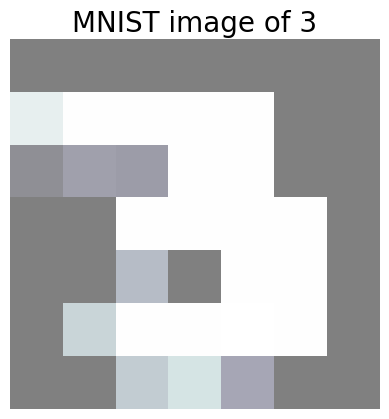

In [2]:
# Load the 7x7 mnist image 
img = np.load('3.npy')
plt.imshow(img,cmap = 'bone', alpha=0.5);
plt.axis('off');
plt.title('MNIST image of 3',fontsize=20);

### ⏸ Consider an input of size $(7,7)$ pixels.What will be the dimensions of the output if you use `pool_size=2`, `strides = 1` & `padding='valid'`?


#### A. $(5,5)$
#### B. $(6,6)$
#### C. $(4,4)$
#### D. $(7,7)$

In [3]:
### edTest(test_chow1) ###
# Submit an answer choice as a string below (eg. if you choose option C, put 'C')
answer1 = 'B'

## Max Pooling

In [4]:
# Specify the variables for pooling 
pool_size = 2
strides = 1

# Padding parameter can be 'valid', 'same', etc.
padding = 'valid'

# Build the model to perform maxpooling operation 
model_1 = Sequential(name = 'MaxPool')
model_1.add(Input(shape = np.expand_dims(img,axis=2).shape))
model_1.add(MaxPool2D(pool_size = pool_size,strides=strides, padding=padding))

# Take a look at the summary to see the output shape
model_1.summary()

Model: "MaxPool"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ max_pooling2d (MaxPooling2D)    │ (None, 6, 6, 1)        │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


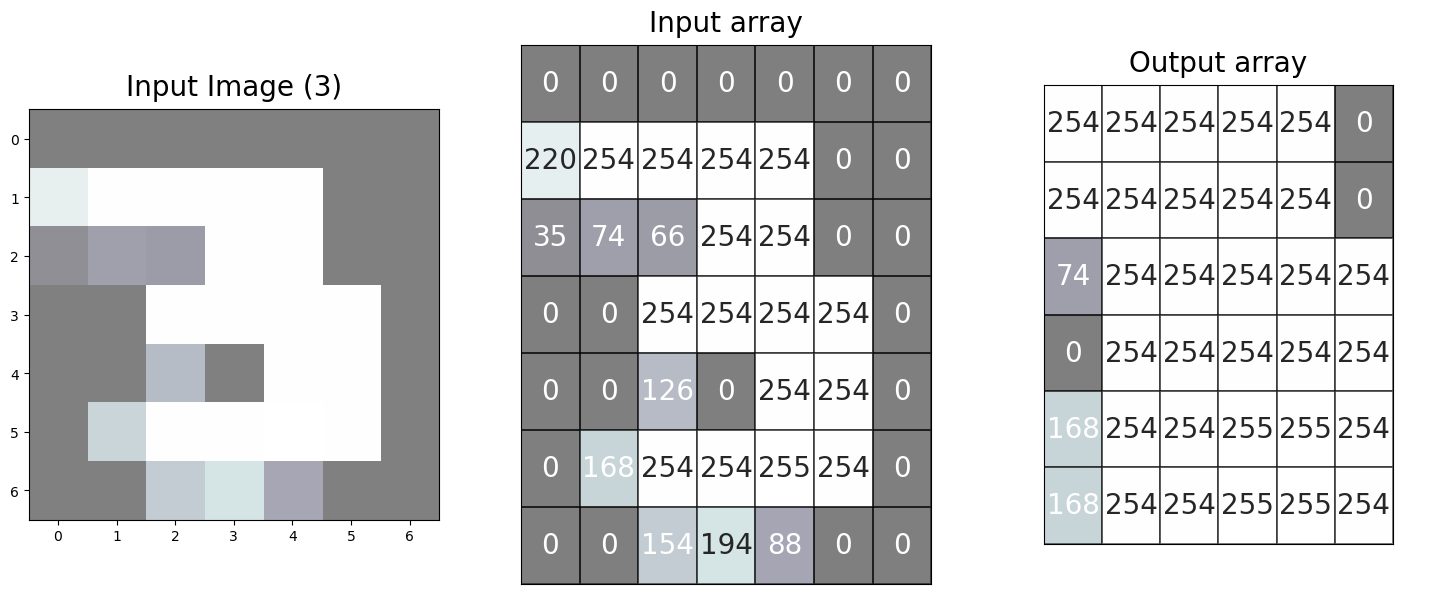

In [5]:
# Output the image using the model above 
# Remember to use np.expand_dims to change input image dimensions
# to 4-d tensor because model_1.predict will not work on 2-d tensor
pooled_img = model_1.predict(np.expand_dims(img, axis=0))


# Use the helper code to visualize the pooling operation 
# np.squeeze() is used to bring the image to 2-dimension 
# to use matplotlib to plot it
pooled_img = pooled_img.squeeze()

# plot_pool is a function that will return 3 plots to help visualize
# the pooling operation
plot_pool(img,pooled_img)

### ⏸ What if your stride is larger than your pool size?


#### A. Operation is invalid
#### B. Operation is valid but you will have an output larger than the input
#### C. Operation is valid but you will miss out on some pixels
#### D. Operation is valid but you will have an output as the same size as the input

In [6]:
### edTest(test_chow2) ###
# Submit an answer choice as a string below 
# (eg. if you choose option C, put 'C')
answer2 = '___'

## Average Pooling

In [8]:
# Specify the variables for pooling 
pool_size = 2
strides = 1

# Padding parameter can be 'valid', 'same', etc.
padding = 'valid'

# Build the model to perform average pooling operation 
model_2 = Sequential(name = 'AveragePool')
model_2.add(Input(shape = np.expand_dims(img,axis=2).shape))
model_2.add(AveragePooling2D(pool_size = pool_size,strides=strides, padding=padding))
model_2.summary()

Model: "AveragePool"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ average_pooling2d_1             │ (None, 6, 6, 1)        │             0 │
│ (AveragePooling2D)              │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


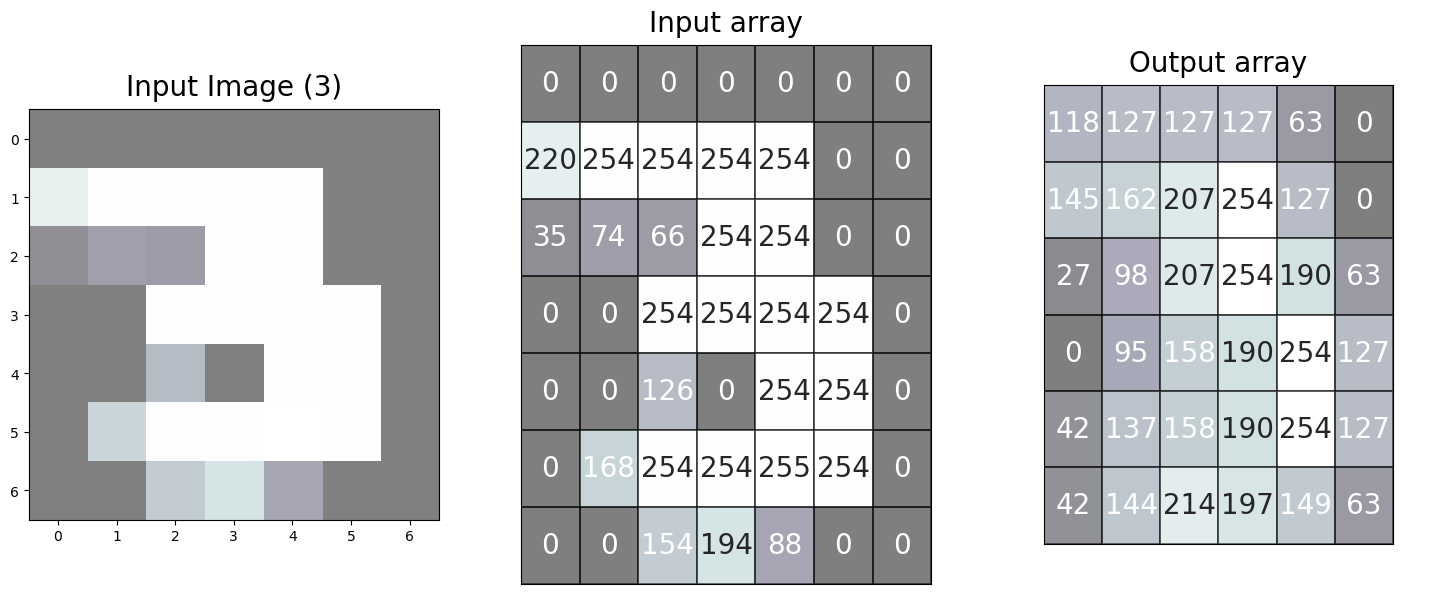

In [9]:
# Output the image using the model above 
# Remember to use np.expand_dims to change input image dimensions
# to 4-d tensor because model_1.predict will not work on 2-d tensor
pooled_img = model_2.predict(np.expand_dims(img, axis=0))


# Use the helper code to visualize the pooling operation 
pooled_img = pooled_img.squeeze()
plot_pool(img,pooled_img)

### ⏸ Which among the following 2 pooling operation activates the input image more? Answer based on your results above.
#### A.  Average pooling
#### B.  Max pooling

In [10]:
### edTest(test_chow3) ###
# Submit an answer choice as a string below 
# (eg. if you choose option A, put 'a')
answer3 = 'A'